# Instalar librerias

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade xlrd
!pip install psycopg2-binary
!pip uninstall rtree
!sudo apt install libspatialindex-dev
!pip install rtree

!pip install GeoAlchemy2
!pip3 install sqlalchemy-utils
!pip install leafmap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 14.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatia

# Conectamos la base de datos.

In [ ]:
# Install PostgreSQL server and PostGIS
!sudo apt-get -y -qq update
!sudo apt-get -y -qq install postgresql postgis

# Start PostgreSQL service
!sudo service postgresql start

# Setup a password 'postgres' for username 'postgres'
!sudo -u postgres psql -U postgres -c "ALTER USER postgres PASSWORD 'postgres';"

# Drop the database if it exists and create a new one
!sudo -u postgres psql -U postgres -c 'DROP DATABASE IF EXISTS db_szh_coello_ohts;'
!sudo -u postgres psql -U postgres -c 'CREATE DATABASE db_szh_coello_ohts;'

# Enable the PostGIS extension in the newly created database
!sudo -u postgres psql -U postgres -d db_szh_coello_ohts -c 'CREATE EXTENSION postgis;'
!sudo -u postgres psql -U postgres -d db_szh_coello_ohts -c 'CREATE EXTENSION postgis_topology;'


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 22.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package logrotate.
(Reading database ... 124625 files and directories currently installed.)
Preparing to unpack .../00-logrotate_3.19.0-1ubuntu1.1_amd64.deb ...
Unpacking logrotate (3.19.0-1ubuntu1.1) ...
Selecting previously unselected package netbase.
Preparing to unpack .../01-netbase_6.3_all.deb ...
Unpacking netbase (6.3) 

In [ ]:
!pg_lsclusters

Ver Cluster Port Status Owner    Data directory              Log file
14  main    5432 online postgres /var/lib/postgresql/14/main /var/log/postgresql/postgresql-14-main.log


In [ ]:
%env TFIO_DEMO_DATABASE_NAME=db_szh_coello_ohts
%env TFIO_DEMO_DATABASE_HOST=localhost
%env TFIO_DEMO_DATABASE_PORT=5432
%env TFIO_DEMO_DATABASE_USER=postgres
%env TFIO_DEMO_DATABASE_PASS=postgres

env: TFIO_DEMO_DATABASE_NAME=db_szh_coello_ohts
env: TFIO_DEMO_DATABASE_HOST=localhost
env: TFIO_DEMO_DATABASE_PORT=5432
env: TFIO_DEMO_DATABASE_USER=postgres
env: TFIO_DEMO_DATABASE_PASS=postgres


In [ ]:
# Listamos los puertos

!sudo lsof -i -P -n | grep LISTEN

node         6     root   21u  IPv6  20320      0t0  TCP *:8080 (LISTEN)
kernel_ma   24     root    3u  IPv4  18669      0t0  TCP 172.28.0.12:6000 (LISTEN)
colab-fil   69     root    3u  IPv4  20338      0t0  TCP 127.0.0.1:3453 (LISTEN)
jupyter-n   90     root    7u  IPv4  21732      0t0  TCP 172.28.0.12:9000 (LISTEN)
python3    244     root   21u  IPv4  23995      0t0  TCP 127.0.0.1:38005 (LISTEN)
python3    283     root    3u  IPv4  24952      0t0  TCP 127.0.0.1:36769 (LISTEN)
python3    283     root    4u  IPv4  24953      0t0  TCP 127.0.0.1:42945 (LISTEN)
postgres  3462 postgres    5u  IPv4  47134      0t0  TCP 127.0.0.1:5432 (LISTEN)


In [ ]:
!cp "/content/drive/MyDrive/Convenio_601/SQL/db_szh_coello_ohts.psql" "/content/db_szh_coello_ohts.psql"
!PGPASSWORD=$TFIO_DEMO_DATABASE_PASS psql -q -h $TFIO_DEMO_DATABASE_HOST -p $TFIO_DEMO_DATABASE_PORT -U $TFIO_DEMO_DATABASE_USER -d $TFIO_DEMO_DATABASE_NAME -f '/content/db_szh_coello_ohts.psql'

 set_config 
------------
 
(1 row)

 setval 
--------
 403614
(1 row)

 setval 
--------
      1
(1 row)

 setval 
--------
    612
(1 row)

 setval 
--------
    646
(1 row)

 setval 
--------
 198696
(1 row)

 setval 
--------
   6528
(1 row)

 setval 
--------
    204
(1 row)

 setval 
--------
    204
(1 row)

 setval 
--------
     98
(1 row)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psutil

import psycopg2
from datetime import datetime
import os
import sys
import hashlib
import re

import pandas as pd
import numpy as np
import folium
from shapely.geometry import Point
import psutil
import os

# Import the modules
from sqlalchemy import create_engine, text
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
from sqlalchemy import Column, Integer, String, Float, ForeignKey, DateTime, Text, SmallInteger
from sqlalchemy.orm import relationship

from shapely.errors import ShapelyDeprecationWarning
import warnings

In [ ]:
import os
from sqlalchemy import create_engine, text
from sqlalchemy.orm import sessionmaker, relationship

# Recuperar las variables de entorno
DB_NAME = os.getenv("TFIO_DEMO_DATABASE_NAME")
DB_HOST = os.getenv("TFIO_DEMO_DATABASE_HOST")
DB_PORT = os.getenv("TFIO_DEMO_DATABASE_PORT")
DB_USER = os.getenv("TFIO_DEMO_DATABASE_USER")
DB_PASS = os.getenv("TFIO_DEMO_DATABASE_PASS")

# Crear la cadena de conexión
DATABASE_URI = f"postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

# Crear el motor de conexión
engine = create_engine(DATABASE_URI)
Session = sessionmaker(bind=engine)
sessionn = Session()


# Query para contar el número de tablas en la base de datos
query = text("""
SELECT * --COUNT(*)
FROM information_schema.tables
WHERE table_schema = 'public';
""")

# Ejecutar el query
with engine.connect() as connection:
    result = connection.execute(query)
    nombres = result.fetchall()
    #count = result.scalar()

# Imprimir el resultado
#print(f"Número de tablas en el esquema 'public': {count}")

In [ ]:
nombres

[('db_szh_coello_ohts', 'public', 'geography_columns', 'VIEW', None, None, None, None, None, 'NO', 'NO', None),
 ('db_szh_coello_ohts', 'public', 'geometry_columns', 'VIEW', None, None, None, None, None, 'YES', 'NO', None),
 ('db_szh_coello_ohts', 'public', 'spatial_ref_sys', 'BASE TABLE', None, None, None, None, None, 'YES', 'NO', None),
 ('db_szh_coello_ohts', 'public', 'indices_de_aridez', 'BASE TABLE', None, None, None, None, None, 'YES', 'NO', None),
 ('db_szh_coello_ohts', 'public', 'metricas_hidrologicas', 'BASE TABLE', None, None, None, None, None, 'YES', 'NO', None),
 ('db_szh_coello_ohts', 'public', 'oferta_total_diaria', 'BASE TABLE', None, None, None, None, None, 'YES', 'NO', None),
 ('db_szh_coello_ohts', 'public', 'rendimiento_hidrico', 'BASE TABLE', None, None, None, None, None, 'YES', 'NO', None),
 ('db_szh_coello_ohts', 'public', 'geog_coord_syst', 'BASE TABLE', None, None, None, None, None, 'YES', 'NO', None),
 ('db_szh_coello_ohts', 'public', 'oferta_total_mensual', 

In [ ]:
query = text("""
SELECT id_sub_zona,	nombre_sub_zona
FROM sub_zonas_hidrograficas

""")

# Ejecutar el query
with engine.connect() as connection:
    result = connection.execute(query)
    data = result.fetchall()
    data = pd.DataFrame(data)
data.head()

,id_sub_zona,nombre_sub_zona
0,1,Directos_Magdalena_Opia
1,2,Directos_Magdalena_Sabandija
2,3,Directos_Magdalena_Gualí
3,4,Directos_Magdalena_Lagunilla
4,5,Directos_Magdalena_Recio_Venadillo


In [ ]:
# Codigo para interpretar
import pandas as pd
import geopandas as gpd


IA = pd.read_excel('/content/drive/MyDrive/Convenio_601/Excel/Indices_de_Aridez.xlsx') # Este es el indice de aridez
# Crear una nueva columna combinando Valor y Color como tupla
IA['Valor_Color'] = list(zip(IA['Valor'], IA['Color']))


# Aqui se filtra el tipo de año
IA = IA[IA['Tipo_Año'] == 'Medio'].copy()
# Reorganizar el DataFrame usando pivot_table
IA_pivot = IA.pivot_table(index='UA_text', columns='Mes', values='Valor_Color', aggfunc='first')


cuencas = gpd.read_file('/content/SZH-COELLO_2d.geojson')
cuencas.keys()

# Definir el orden específico
orden = cuencas['Nombre_1'].values

print(orden)

# Convertir el índice a tipo categórico con orden específico
IA_pivot.index = pd.Categorical(IA_pivot.index, categories=orden, ordered=True)

# Ordenar el DataFrame por el índice categórico
IA_pivot = IA_pivot.sort_index()

# Definir el orden cronológico de los meses
orden_meses = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC']

# Reordenar las columnas del DataFrame según el orden definido
IA_pivot = IA_pivot[orden_meses]

# Imprimir el resultado
IA_pivot

['Rio_Toche' 'Rio_Coello_1' 'Rio_Bermellon_1' 'Rio_Anaime'
 'Rio_Bermellon_2' 'Rio_Coello_2' 'Rio_Cocora' 'Rio_Coello_3'
 'Rio_Combeima_1' 'Rio_Combeima_2' 'Rio_Combeima_3' 'Rio_Combeima_4'
 'Rio_Coello_4' 'Quebrada_Gualanday' 'Rio_Coello_5' 'Quebrada_Chaguala'
 'Rio_Coello_6']


Mes,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
Rio_Toche,"(0.201251667, #06ba21)","(0.160189692, #5dd1e8)","(0.092466629, #FFFFFF)","(0.073011675, #FFFFFF)","(0.060898587, #FFFFFF)","(0.091739891, #FFFFFF)","(0.104211611, #0758a8)","(0.144830617, #0758a8)","(0.09404548, #FFFFFF)","(0.067147139, #FFFFFF)","(0.067020215, #FFFFFF)","(0.117049314, #0758a8)"
Rio_Coello_1,"(0.267224034, #06ba21)","(0.210887987, #06ba21)","(0.114667443, #0758a8)","(0.08975995, #FFFFFF)","(0.076442153, #FFFFFF)","(0.116019386, #0758a8)","(0.136239371, #0758a8)","(0.198134475, #5dd1e8)","(0.124937439, #0758a8)","(0.088826699, #FFFFFF)","(0.094601177, #FFFFFF)","(0.15921626, #5dd1e8)"
Rio_Bermellon_1,"(0.223979479, #06ba21)","(0.189015443, #5dd1e8)","(0.108086372, #0758a8)","(0.07715929, #FFFFFF)","(0.071948654, #FFFFFF)","(0.115183461, #0758a8)","(0.144143427, #0758a8)","(0.206320392, #06ba21)","(0.130374382, #0758a8)","(0.083967586, #FFFFFF)","(0.083089753, #FFFFFF)","(0.134042812, #0758a8)"
Rio_Anaime,"(0.232131647, #06ba21)","(0.199707814, #5dd1e8)","(0.116137934, #0758a8)","(0.078256179, #FFFFFF)","(0.075992979, #FFFFFF)","(0.117954075, #0758a8)","(0.148409406, #0758a8)","(0.215618754, #06ba21)","(0.142564765, #0758a8)","(0.093689504, #FFFFFF)","(0.088644606, #FFFFFF)","(0.143418439, #0758a8)"
Rio_Bermellon_2,"(0.289862155, #06ba21)","(0.231295969, #06ba21)","(0.125367842, #0758a8)","(0.092867703, #FFFFFF)","(0.082021538, #FFFFFF)","(0.131685128, #0758a8)","(0.165895386, #5dd1e8)","(0.235497448, #06ba21)","(0.151898171, #5dd1e8)","(0.102074856, #0758a8)","(0.104750214, #0758a8)","(0.171795486, #5dd1e8)"
Rio_Coello_2,"(0.249970411, #06ba21)","(0.21776158, #06ba21)","(0.116008845, #0758a8)","(0.088492683, #FFFFFF)","(0.085064922, #FFFFFF)","(0.143695032, #0758a8)","(0.185793199, #5dd1e8)","(0.250455979, #06ba21)","(0.148560149, #0758a8)","(0.097355973, #FFFFFF)","(0.102643975, #0758a8)","(0.162804156, #5dd1e8)"
Rio_Cocora,"(0.232745255, #06ba21)","(0.192188152, #5dd1e8)","(0.101670167, #0758a8)","(0.078795087, #FFFFFF)","(0.075033019, #FFFFFF)","(0.120474841, #0758a8)","(0.151088617, #5dd1e8)","(0.204848064, #06ba21)","(0.132870643, #0758a8)","(0.089272544, #FFFFFF)","(0.089037934, #FFFFFF)","(0.142462027, #0758a8)"
Rio_Coello_3,"(0.24108715, #06ba21)","(0.220342338, #06ba21)","(0.117696535, #0758a8)","(0.084723812, #FFFFFF)","(0.089417557, #FFFFFF)","(0.187914425, #5dd1e8)","(0.260967163, #06ba21)","(0.318937319, #98e320)","(0.177517668, #5dd1e8)","(0.100188052, #0758a8)","(0.097668235, #FFFFFF)","(0.156197984, #5dd1e8)"
Rio_Combeima_1,"(0.236881341, #06ba21)","(0.188642469, #5dd1e8)","(0.096763623, #FFFFFF)","(0.073477949, #FFFFFF)","(0.063502377, #FFFFFF)","(0.08587079, #FFFFFF)","(0.103897567, #0758a8)","(0.129608521, #0758a8)","(0.086976773, #FFFFFF)","(0.074760359, #FFFFFF)","(0.084332115, #FFFFFF)","(0.157447127, #5dd1e8)"
Rio_Combeima_2,"(0.212310445, #06ba21)","(0.172885056, #5dd1e8)","(0.092389502, #FFFFFF)","(0.076675034, #FFFFFF)","(0.071447898, #FFFFFF)","(0.106108884, #0758a8)","(0.126938105, #0758a8)","(0.162485994, #5dd1e8)","(0.104408054, #0758a8)","(0.077064427, #FFFFFF)","(0.093350131, #FFFFFF)","(0.144283445, #0758a8)"


In [ ]:
import pandas as pd
import geopandas as gpd

IA = pd.read_excel('/content/drive/MyDrive/Convenio_601/Excel/Indices_de_Aridez.xlsx') # Este es el índice de aridez
# Crear una nueva columna combinando Valor y Color como tupla
IA['Valor_Color'] = list(zip(IA['Valor'], IA['Color']))

# Aquí se filtra el tipo de año
IA = IA[IA['Tipo_Año'] == 'Medio'].copy()
# Reorganizar el DataFrame usando pivot_table
IA_pivot = IA.pivot_table(index='UA_text', columns='Mes', values='Valor_Color', aggfunc='first')

cuencas = gpd.read_file('SZH-COELLO_2d.geojson')
cuencas.keys()

# Definir el orden específico
orden = cuencas['Nombre_1'].values
"""
orden = ['Rio_Toche', 'Rio_Coello_1', 'Rio_Bermellon_1', 'Rio_Anaime',
        'Rio_Bermellon_2', 'Rio_Coello_2', 'Rio_Cocora', 'Rio_Coello_3',
        'Rio_Combeima_1', 'Rio_Combeima_2', 'Rio_Combeima_3', 'Rio_Combeima_4',
        'Rio_Coello_4', 'Quebrada_Gualanday', 'Rio_Coello_5', 'Quebrada_Chagualá',
        'Rio_Coello_6']
"""

print("*************")
print(orden)

# Convertir el índice a tipo categórico con orden específico
IA_pivot.index = pd.CategoricalIndex(IA_pivot.index, categories=orden, ordered=True)

# Reordenar el DataFrame por el índice categórico
IA_pivot = IA_pivot.sort_index()

# Definir el orden cronológico de los meses
orden_meses = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC']
# Reordenar las columnas del DataFrame según el orden definido
IA_pivot = IA_pivot[orden_meses]

# Imprimir el resultado
IA_pivot

#IA_pivot.to_excel("prueba.xlsx")

*************
['Rio_Toche' 'Rio_Coello_1' 'Rio_Bermellon_1' 'Rio_Anaime'
 'Rio_Bermellon_2' 'Rio_Coello_2' 'Rio_Cocora' 'Rio_Coello_3'
 'Rio_Combeima_1' 'Rio_Combeima_2' 'Rio_Combeima_3' 'Rio_Combeima_4'
 'Rio_Coello_4' 'Quebrada_Gualanday' 'Rio_Coello_5' 'Quebrada_Chaguala'
 'Rio_Coello_6']


Mes,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
UA_text,,,,,,,,,,,,
Rio_Toche,"(0.201251667, #06ba21)","(0.160189692, #5dd1e8)","(0.092466629, #FFFFFF)","(0.073011675, #FFFFFF)","(0.060898587, #FFFFFF)","(0.091739891, #FFFFFF)","(0.104211611, #0758a8)","(0.144830617, #0758a8)","(0.09404548, #FFFFFF)","(0.067147139, #FFFFFF)","(0.067020215, #FFFFFF)","(0.117049314, #0758a8)"
Rio_Coello_1,"(0.267224034, #06ba21)","(0.210887987, #06ba21)","(0.114667443, #0758a8)","(0.08975995, #FFFFFF)","(0.076442153, #FFFFFF)","(0.116019386, #0758a8)","(0.136239371, #0758a8)","(0.198134475, #5dd1e8)","(0.124937439, #0758a8)","(0.088826699, #FFFFFF)","(0.094601177, #FFFFFF)","(0.15921626, #5dd1e8)"
Rio_Bermellon_1,"(0.223979479, #06ba21)","(0.189015443, #5dd1e8)","(0.108086372, #0758a8)","(0.07715929, #FFFFFF)","(0.071948654, #FFFFFF)","(0.115183461, #0758a8)","(0.144143427, #0758a8)","(0.206320392, #06ba21)","(0.130374382, #0758a8)","(0.083967586, #FFFFFF)","(0.083089753, #FFFFFF)","(0.134042812, #0758a8)"
Rio_Anaime,"(0.232131647, #06ba21)","(0.199707814, #5dd1e8)","(0.116137934, #0758a8)","(0.078256179, #FFFFFF)","(0.075992979, #FFFFFF)","(0.117954075, #0758a8)","(0.148409406, #0758a8)","(0.215618754, #06ba21)","(0.142564765, #0758a8)","(0.093689504, #FFFFFF)","(0.088644606, #FFFFFF)","(0.143418439, #0758a8)"
Rio_Bermellon_2,"(0.289862155, #06ba21)","(0.231295969, #06ba21)","(0.125367842, #0758a8)","(0.092867703, #FFFFFF)","(0.082021538, #FFFFFF)","(0.131685128, #0758a8)","(0.165895386, #5dd1e8)","(0.235497448, #06ba21)","(0.151898171, #5dd1e8)","(0.102074856, #0758a8)","(0.104750214, #0758a8)","(0.171795486, #5dd1e8)"
Rio_Coello_2,"(0.249970411, #06ba21)","(0.21776158, #06ba21)","(0.116008845, #0758a8)","(0.088492683, #FFFFFF)","(0.085064922, #FFFFFF)","(0.143695032, #0758a8)","(0.185793199, #5dd1e8)","(0.250455979, #06ba21)","(0.148560149, #0758a8)","(0.097355973, #FFFFFF)","(0.102643975, #0758a8)","(0.162804156, #5dd1e8)"
Rio_Cocora,"(0.232745255, #06ba21)","(0.192188152, #5dd1e8)","(0.101670167, #0758a8)","(0.078795087, #FFFFFF)","(0.075033019, #FFFFFF)","(0.120474841, #0758a8)","(0.151088617, #5dd1e8)","(0.204848064, #06ba21)","(0.132870643, #0758a8)","(0.089272544, #FFFFFF)","(0.089037934, #FFFFFF)","(0.142462027, #0758a8)"
Rio_Coello_3,"(0.24108715, #06ba21)","(0.220342338, #06ba21)","(0.117696535, #0758a8)","(0.084723812, #FFFFFF)","(0.089417557, #FFFFFF)","(0.187914425, #5dd1e8)","(0.260967163, #06ba21)","(0.318937319, #98e320)","(0.177517668, #5dd1e8)","(0.100188052, #0758a8)","(0.097668235, #FFFFFF)","(0.156197984, #5dd1e8)"
Rio_Combeima_1,"(0.236881341, #06ba21)","(0.188642469, #5dd1e8)","(0.096763623, #FFFFFF)","(0.073477949, #FFFFFF)","(0.063502377, #FFFFFF)","(0.08587079, #FFFFFF)","(0.103897567, #0758a8)","(0.129608521, #0758a8)","(0.086976773, #FFFFFF)","(0.074760359, #FFFFFF)","(0.084332115, #FFFFFF)","(0.157447127, #5dd1e8)"


In [ ]:
#Define escala de colores IA:
colorscale1=[[0.0/1, '#FFFFFF'], [0.001/1, '#FFFFFF'],[0.001/1, '#0758a8'], [0.15/1, '#0758a8'],[0.15/1, '#5dd1e8'],[0.2/1, '#5dd1e8'],
            [0.2/1, '#06ba21'],[0.3/1, '#06ba21'],[0.3/1, '#98e320'],[0.4/1, '#98e320'],[0.4/1, '#EEEE00'],[0.5/1, '#EEEE00'],
            [0.5/1, '#FFA500'],[0.6/1, '#FFA500'],[0.6/1, '#EE0000'],[1, '#EE0000']]
#------------------------------------------------------------------------------------------------------------------------------------------
#reordena 2 listas de listas así: ..... formato requerido para customdata del hover
#                                    lista1=[['a','b','c','d'],['w','x','y','z']]
#                                    lista2=[[1,2,3,4],[40,41,42,43]]
#     nueva lista:                   lista_hover=[[['a',1],['b',2],['c',3],['d',4]],[['w',40],['x',41],['y',42],['z',43]]]

#Crea matriz de categorias con los datos IA a graficar (fue necesario para asegurar que cada dato se clasifique en la cateoría que corresponda)
def fzt(zs):
  zt=[[0.65 if x>=0.6 else 0.55 if x>=0.5 else 0.45 if x>=0.4 else 0.35 if x>=0.3 else 0.25 if x>=0.2 else 0.17 if x>=0.15 else 0.1 for x in lst1] for lst1 in zs]
  zt.append([0,0,0,0,0,0,0,0,0,0,0,0])                               #filas adicionales para mostrar con imshow la escala de categorias
  zt.append([1,1,1,0.55,0.55,0.55,0.45,0.45,0.45,0.35,0.35,0.35])    #filas adicionales para mostrar con imshow la escala de categorias
  zt.append([0.25,0.25,0.25,0.17,0.17,0.17,0.1,0.1,0.1,0,0,0])       #filas adicionales para mostrar con imshow la escala de categorias
  return zt

def flstHov(lst1,lst2):
  lst_out=[]
  for a,b in zip(lst1,lst2): lst_out.append(list(map(list,(zip(a,b)))))
  return lst_out

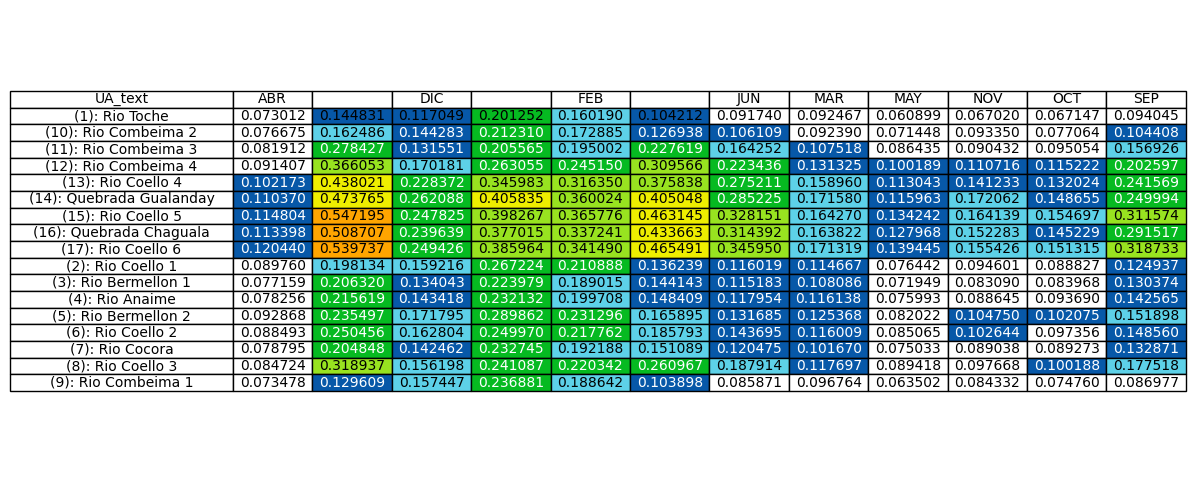

In [ ]:
from matplotlib.colors import to_rgba, rgb_to_hsv
import matplotlib.pyplot as plt

# Crear la tabla en Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')

table_data = []
cell_colors = []
text_colors = []

# Preparar los datos para la tabla
for index, row in IA_pivot.iterrows():
    table_row = []
    row_colors = []
    row_text_colors = []
    for cell in row:
        if cell:  # Si hay datos en la celda
            valor, color = cell
            table_row.append(f"{valor:.6f}")
            rgba_color = to_rgba(color)
            row_colors.append(rgba_color)

            # Determinar el color del texto basado en la luminosidad del fondo
            r, g, b = rgba_color[:3]
            luminosity = 0.299 * r + 0.587 * g + 0.114 * b
            text_color = "#FFFFFF" if luminosity < 0.5 else "#000000"
            row_text_colors.append(text_color)
        else:  # Si no hay datos, celda vacía
            table_row.append("")
            row_colors.append(to_rgba("#FFFFFF"))
            row_text_colors.append("#000000")  # Texto negro para celdas vacías
    table_data.append(table_row)
    cell_colors.append(row_colors)
    text_colors.append(row_text_colors)

# Agregar índices como primera columna
table_data = [[index] + row for index, row in zip(IA_pivot.index, table_data)]
cell_colors = [[to_rgba("#FFFFFF")] + row for row in cell_colors]
text_colors = [["#000000"] + row for row in text_colors]

# Encabezados de la tabla
columns = ["UA_text"] + list(IA_pivot.columns)

# Crear la tabla
mpl_table = ax.table(
    cellText=table_data,
    colLabels=columns,
    cellColours=cell_colors,
    loc='center',
    cellLoc='center'
)

# Ajustar el tamaño del texto y colores dinámicamente
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(10)
mpl_table.auto_set_column_width(col=list(range(len(columns))))

# Aplicar los colores dinámicos al texto de cada celda
for i, key in enumerate(mpl_table.get_celld()):
    cell = mpl_table.get_celld()[key]
    if i >= len(columns):  # Saltar la fila de encabezados
        row_idx = key[0] - 1  # Ajustar índice de fila
        col_idx = key[1]
        cell_text_color = text_colors[row_idx][col_idx]
        cell.get_text().set_color(cell_text_color)

# Mostrar la figura
plt.show()